## Import Packages

In [135]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import geopandas as gpd
import random

## Import Files

In [205]:
sa1_to_poa = gpd.read_file("Shape\sa1_to_poa.gpkg")
sa1_to_lga = gpd.read_file("Shape\sa1_to_lga.gpkg")
poa_selected = gpd.read_file("Shape\poa_selected.gpkg")
sa1_poa = sa1_to_poa[["SA1_CODE21", "SA2_CODE21", "SA3_CODE21", "POA_CODE21"]]
sa1_lga = sa1_to_lga[["SA1_CODE21", "LGA_CODE21"]]

In [198]:
sa2_to_poa = gpd.read_file("Shape\SA2_2021_AUST_SHP_GDA2020\SA2_2021_AUST_GDA2020.shp")

In [211]:
synthetic = pd.read_csv("Data\clean1.1_data.csv")
synthetic["SA1"] = synthetic["SA1"].astype(str)
synthetic = synthetic.merge(sa1_poa, left_on="SA1", right_on="SA1_CODE21", how="left")
synthetic = synthetic.merge(sa1_lga, on="SA1_CODE21", how="left")
synthetic = synthetic.drop(columns="SA1")
desired_column_order = ['SA1_CODE21', 'POA_CODE21', 'LGA_CODE21']

# Reorder the columns
synthetic = synthetic[desired_column_order + [col for col in synthetic.columns if col not in desired_column_order]]

In [229]:
sa1_to_poa.merge(synthetic, on='SA1_CODE21', how='left')

,SA1_CODE21,CHG_FLAG21,CHG_LBL21,SA2_CODE21_x,SA2_NAME21,SA3_CODE21_x,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,...,dwelltype_Terrace/Townhouse,owndwell_Being Purchased,owndwell_Being Rented,owndwell_Fully Owned,owndwell_Occupied Rent-Free,owndwell_Something Else,SA2_CODE21_y,SA3_CODE21_y,own,high_income
0,20102100908,0,No change,201021009,Bacchus Marsh Surrounds,20102,Creswick - Daylesford - Ballan,201,Ballarat,2RVIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20102100910,0,No change,201021009,Bacchus Marsh Surrounds,20102,Creswick - Daylesford - Ballan,201,Ballarat,2RVIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20301103507,0,No change,203011035,Golden Plains - South,20301,Barwon - West,203,Geelong,2RVIC,...,0.0,1.0,0.0,0.0,0.0,0.0,203011035,20301,1.0,0.0
3,20301103507,0,No change,203011035,Golden Plains - South,20301,Barwon - West,203,Geelong,2RVIC,...,0.0,0.0,1.0,0.0,0.0,0.0,203011035,20301,0.0,0.0
4,20301103507,0,No change,203011035,Golden Plains - South,20301,Barwon - West,203,Geelong,2RVIC,...,0.0,1.0,0.0,0.0,0.0,0.0,203011035,20301,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858225,21402159223,2,Code change,214021592,Mornington - West,21402,Mornington Peninsula,214,Mornington Peninsula,2GMEL,...,0.0,0.0,0.0,1.0,0.0,0.0,214021592,21402,1.0,0.0
1858226,21402159223,2,Code change,214021592,Mornington - West,21402,Mornington Peninsula,214,Mornington Peninsula,2GMEL,...,0.0,0.0,0.0,1.0,0.0,0.0,214021592,21402,1.0,0.0
1858227,21402159223,2,Code change,214021592,Mornington - West,21402,Mornington Peninsula,214,Mornington Peninsula,2GMEL,...,0.0,1.0,0.0,0.0,0.0,0.0,214021592,21402,1.0,0.0
1858228,21402159223,2,Code change,214021592,Mornington - West,21402,Mornington Peninsula,214,Mornington Peninsula,2GMEL,...,0.0,0.0,1.0,0.0,0.0,0.0,214021592,21402,0.0,0.0


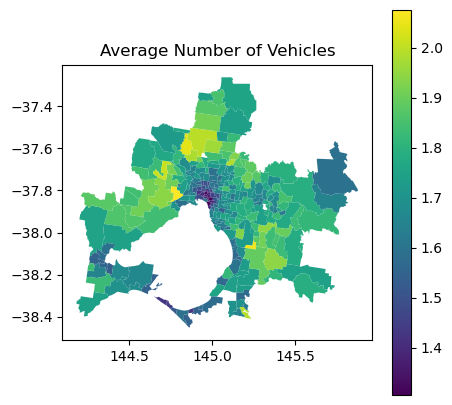

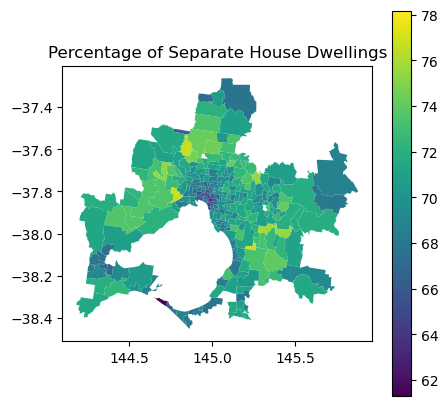

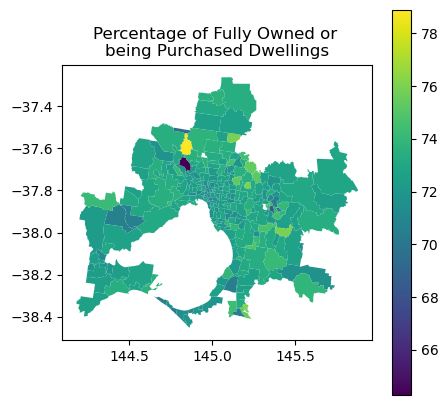

In [219]:
# Define the size variable for all plots
plot_size = (5, 5)  # Adjust the size as needed

# Vehicles
totalvehs_poa = synthetic.groupby('POA_CODE21')['TOTALVEHS'].mean().reset_index()
lga_with_totalvehs = poa_selected.merge(totalvehs_poa, on='POA_CODE21', how='left')
lga_with_totalvehs.plot(column='TOTALVEHS', cmap='viridis', legend=True, figsize=plot_size)
plt.title('Average Number of Vehicles')
plt.show()

# Dwelltype
sepHouse_by_poa = synthetic.groupby('POA_CODE21')['dwelltype_Separate House'].mean().reset_index()
sepHouse_by_poa['dwelltype_Separate House'] *= 100
lga_with_sepHouse = poa_selected.merge(sepHouse_by_poa, on='POA_CODE21', how='left')
lga_with_sepHouse.plot(column='dwelltype_Separate House', cmap='viridis', legend=True, figsize=plot_size)
plt.title('Percentage of Separate House Dwellings')
plt.show()

# Fully Own
synthetic['own'] = synthetic['owndwell_Being Purchased'] + synthetic['owndwell_Fully Owned']
ownHouse_by_poa = synthetic.groupby('POA_CODE21')['own'].mean().reset_index()
ownHouse_by_poa['own'] *= 100
lga_with_ownHouse = poa_selected.merge(ownHouse_by_poa, on='POA_CODE21', how='left')
lga_with_ownHouse.plot(column='own', cmap='viridis', legend=True, figsize=plot_size)
plt.title('Percentage of Fully Owned or \nbeing Purchased Dwellings')
plt.show()


# Income

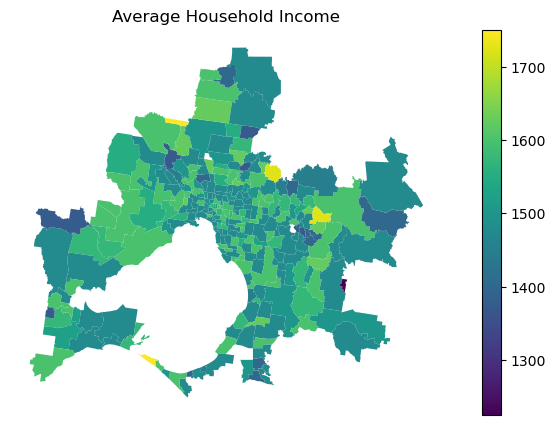

In [223]:
hhinc_by_poa = synthetic.groupby('POA_CODE21')['INC'].median().reset_index()
poa_with_hhinc = poa_selected.merge(hhinc_by_poa, on='POA_CODE21', how='left')

fig, ax1 = plt.subplots(figsize=(10, 5))
poa_with_hhinc.plot(column='INC', cmap='viridis', legend=True, ax=ax1)
ax1.set_title('Average Household Income')
ax1.axis('off')
plt.show()

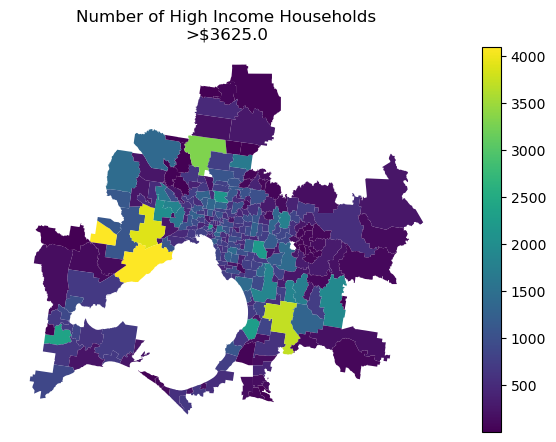

In [225]:
hhinc_90th_percentile = np.percentile(synthetic["INC"], 90)
synthetic.loc[synthetic["INC"] < hhinc_90th_percentile, "high_income"] = 0
synthetic.loc[synthetic["INC"] >= hhinc_90th_percentile, "high_income"] = 1

poa_count = synthetic.groupby('POA_CODE21')['POA_CODE21'].count().reset_index(name='poa_count')
high_inc_sum = synthetic.groupby('POA_CODE21')['high_income'].sum().reset_index(name='high_inc_count')

# Merge the two DataFrames on 'POA_CODE21'
poa_totals = poa_count.merge(high_inc_sum, on='POA_CODE21', how='inner')
poa_totals["percentage"] = poa_totals["high_inc_count"] / poa_totals["poa_count"]*100
poa_high_inc = poa_selected.merge(poa_totals, on='POA_CODE21', how='left')

# Create the second plot for "Number of High Income Households"
fig, ax2 = plt.subplots(figsize=(10, 5))
poa_high_inc.plot(column='high_inc_count', cmap='viridis', legend=True, ax=ax2)
ax2.set_title(f'Number of High Income Households\n>${hhinc_90th_percentile}')
ax2.axis('off')

# fig, ax3 = plt.subplots(figsize=(10, 5))
# poa_high_inc.plot(column='percentage', cmap='viridis', legend=True, ax=ax3)
# ax3.set_title(f'Percenatge of Households that are High Income Households\n>${hhinc_90th_percentile}')
# ax3.axis('off')
plt.show()